In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Measured qubit frequencies ###

f01 = 4.629 # 4.9774     # [GHz]
f12 = 4.357 # 4.7167     # [GHz]
#fread = 6.877   # [GHz]

In [ ]:
### Energies Ec and Ej ###

# Ec/2 = f01 - f02
# f02 = (f01+f12)/2 = f01 - Ec/2
Ec = f01 - f12

# f01 = sqrt(8EcEj)-Ec [GHz]
Ej = (f01 + Ec)**2 / (8*Ec)



print('Ec =', "{:.3f}".format(Ec), 'GHz')
print('Ej =', "{:.3f}".format(Ej), 'GHz')

Ec = 0.272 GHz
Ej = 11.039 GHz


In [ ]:
### Capacitance of the transmon ###
# Ec = e^2/2C
# e = 1.6 * 10^(-19)
# 1 eV = 2.41799 * 10^14 Hz
# 1 Hz = 6.626 *10^(-34) J
# F = C^2/J
e = 1.6 * 10**(-19) # [C]
Hz_to_J =  6.626 *10**(-34) # Plank constant h
C = e**2 / (2*Ec*10**9*Hz_to_J) # 3.5 fF input BlackBox JJ Akash

print('C =', C, 'F')

C = 7.102146623817067e-14 F


In [ ]:
### Inductance of the transmon ###
# Ej = phi0^2/Lj
# phi0 = 2.067 * 10^(-15) Wb
# H = J/A^2
# Wb = J/A
phi0 = 2.067 * 10**(-15) # [Wb]
Lj = phi0**2 / (Ej * 10**9 * (2*np.pi)**2 * Hz_to_J) # 13 nH input BlackBox JJ Akash

print('Lj =', Lj, 'H')

Lj = 1.479650928483151e-08 H


In [5]:
print('f01 =', f01, 'GHz')
print('f12 =', f12, 'GHz')
print('Ec =', "{:.3f}".format(Ec), 'GHz')
print('Ej =', "{:.3f}".format(Ej), 'GHz')
print('Ej/Ec =', "{:.3f}".format(Ej/Ec))
print('C =', "{:.3f}".format(C*10**15), 'E-15 F')
print('Lj =', "{:.3f}".format(Lj*10**9), 'E-9 H')

f01 = 4.629 GHz
f12 = 4.357 GHz
Ec = 0.272 GHz
Ej = 11.039 GHz
Ej/Ec = 40.583
C = 71.021 E-15 F
Lj = 14.797 E-9 H


In [6]:
# Ambegaokar-Baratoff relation -> Extract Lj from resistance measurement at room temperature (Rn)
# Compare with: https://quaxys.com/Calculators/Transmon_qubit
# and https://antonpotocnik.com/?p=560257
# Ic * Rn = pi/(2e) * delta(T) * tanh(delta(T)/(2k_b * T))
# Ic = pi * delta(0) / (2e*Rn)
# Ej = Ic * h_bar/2e
# Lj = phi0^2 / Ej

Rt = 10 * 10**3 # Ohm
h = Hz_to_J
delta0 = 170 * 10**(-6) # [V] Value for aluminum
Lj_AB = phi0**2 * 8 * e**2 * Rt / (h * delta0) # Wrong units, some conversion factor missing.

print(Lj_AB)

f01_AB = np.sqrt(delta0/(h*C*Rt))-e**2/(2*h*C)
print(f01_AB)

7.768023891621247e-26
1.900657780847619e+19


In [7]:
# Ej/2pi = 13.1 GHz
# Ic = 26.3853 nA
# Ej = Ic * h_bar/2e 
# Ej = Ic * phi0/2pi

# 1 eV = 1.602 177 * 10**(-19) J

Ic1 = 26.3853 * 10**(-9) # A
Ej_AB = Ic1 * phi0 /(2*np.pi) / Hz_to_J # Wb * A = J, factor h to convert to Hz
print('Ej_AB', Ej_AB * 10**(-9), ' GHz')

Ic_AB = np.pi * delta0 / (2*Rt)
print('Ic_AB =', Ic_AB * 10**9, 'nA')

C_AB = 75 * 10**(-15) # F
Ec_AB = e**2 / (2*C_AB*Hz_to_J)
f01_AB = np.sqrt(8*Ej_AB*Ec_AB)-Ec_AB
print('Ec_AB =', Ec_AB * 10**(-9), 'GHz')
print('f1_AB =', f01_AB * 10**(-9), 'GHz')

Ej_AB 13.09999751216823  GHz
Ic_AB = 26.70353755551324 nA
Ec_AB = 0.25757118422376496 GHz
f1_AB = 4.937951405497153 GHz


In [8]:
R = np.linspace(5000, 25000, 201)
C = 75 * 10**(-15) # F
EC = e**2 / (2*C*Hz_to_J)
IC = np.pi * delta0 / (2*R)
EJ = IC * phi0 /(2*np.pi) / Hz_to_J # Wb * A = J, factor h to convert to Hz
f = np.sqrt(8*EJ*EC)-EC


Text(0, 0.5, 'Ej/Ec')

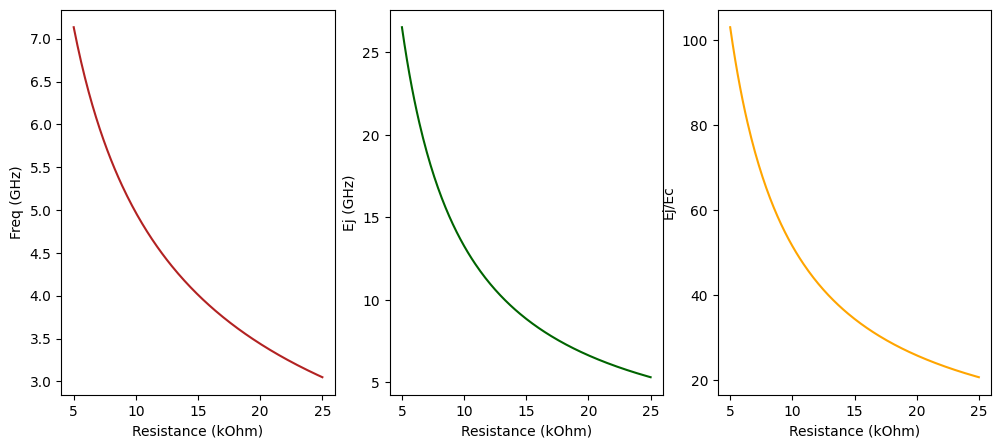

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

ax1.plot(R*10**(-3), f*10**(-9), color = 'firebrick')
ax1.set_xlabel('Resistance (kOhm)')
ax1.set_ylabel('Freq (GHz)')

ax2.plot(R*10**(-3), EJ*10**(-9), color = 'darkgreen')
ax2.set_xlabel('Resistance (kOhm)')
ax2.set_ylabel('Ej (GHz)')

ax3.plot(R*10**(-3), EJ/EC, color = 'orange')
ax3.set_xlabel('Resistance (kOhm)')
ax3.set_ylabel('Ej/Ec')

Text(0, 0.5, 'Freq (GHz)')

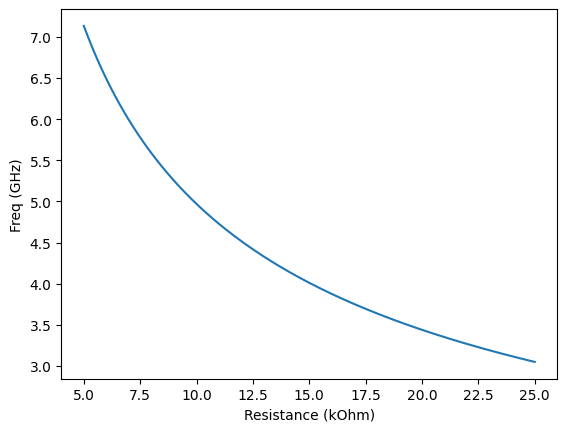

In [9]:
plt.plot(R*10**(-3),f*10**(-9))
plt.xlabel('Resistance (kOhm)')
plt.ylabel('Freq (GHz)')

Text(0, 0.5, 'Ej (GHz)')

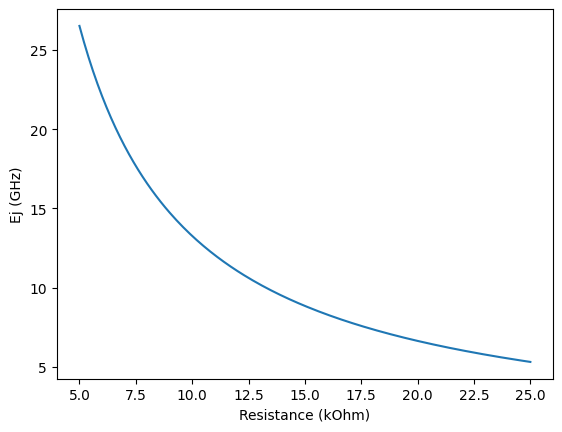

In [10]:
plt.plot(R*10**(-3),EJ*10**(-9))
plt.xlabel('Resistance (kOhm)')
plt.ylabel('Ej (GHz)')

Text(0, 0.5, 'Ej/Ec')

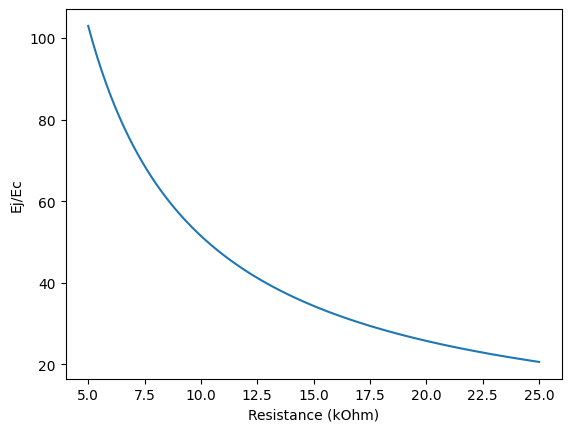

In [11]:
plt.plot(R*10**(-3),EJ/EC)
plt.xlabel('Resistance (kOhm)')
plt.ylabel('Ej/Ec')